<a href="https://colab.research.google.com/github/Rub-T/challenge-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Primero se importa la libreria de matplot para poder utilizar sus funciones y gráficas, ademas de estyablecer un mejor formato para la lectura de cantidades.

In [2]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.0f}'.format

Aqui se realiza la suma de los ingresos de cada tienda y se crea un data frame para una mejor visualización de los resultados.

In [3]:
ingreso_tienda1=tienda['Precio'].sum()
ingreso_tienda2=tienda2['Precio'].sum()
ingreso_tienda3=tienda3['Precio'].sum()
ingreso_tienda4=tienda4['Precio'].sum()
ingresos_df=pd.DataFrame({"Tiendas":["Tienda 1","Tienda 2","Tienda 3","Tienda 4"],
                          "Total":[ingreso_tienda1,ingreso_tienda2,ingreso_tienda3,ingreso_tienda4]})
display(ingresos_df)

,Tiendas,Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


Ahora con los datos obtenidos, creamos una gráfica para comparar y visualizar de major manera los ingresos en cada tienda.

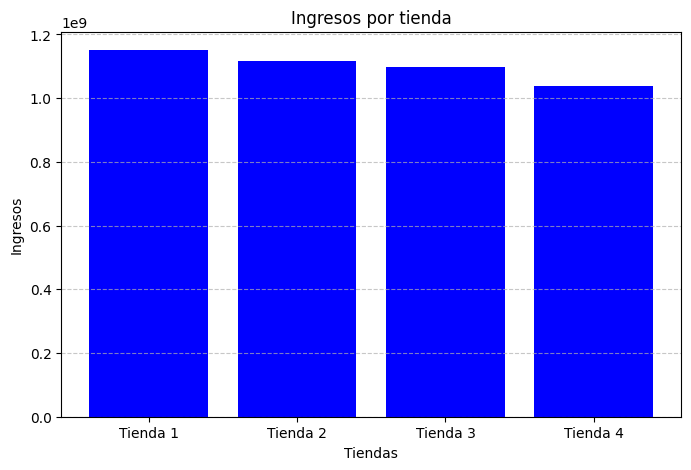

In [4]:
plt.figure(figsize=(8, 5))
plt.bar(ingresos_df["Tiendas"],ingresos_df["Total"],color="blue")
plt.title("Ingresos por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos darnos cuenta de que la tienda es la que tuvo un ingreso mayor, aunque la diferencia con las demás no es mucha.

# 2. Ventas por categoría

In [10]:
lista_tiendas=[(1,tienda),(2,tienda2),(3,tienda3),(4,tienda4)]
for i in lista_tiendas:
  print(f"\nTienda {i[0]} - No. de ventas por categoría:\n")
  venta_por_categoria=i[1].groupby('Categoría del Producto')['Producto'].count().reset_index(name="Numero de ventas")

  print(venta_por_categoria)



Tienda 1 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Tienda 2 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Tienda 3 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para e

# 3. Calificación promedio de la tienda


In [22]:
def calcular_calificacion(tiendas_data):
  calificaciones_lista=[]
  for i in lista_tiendas:
    calif_por_tienda= i[1]['Calificación'].mean().round(2)
    nombre= f"Tienda {i[0]}"
    calificaciones_lista.append({'Tienda': nombre, 'Calificación Promedio': calif_por_tienda})
    print(f'La calificación promedio de la {nombre} es: {calif_por_tienda}')
  return calificaciones_lista
calificaciones_lista=calcular_calificacion(lista_tiendas)

La calificación promedio de la Tienda 1 es: 3.98
La calificación promedio de la Tienda 2 es: 4.04
La calificación promedio de la Tienda 3 es: 4.05
La calificación promedio de la Tienda 4 es: 4.0


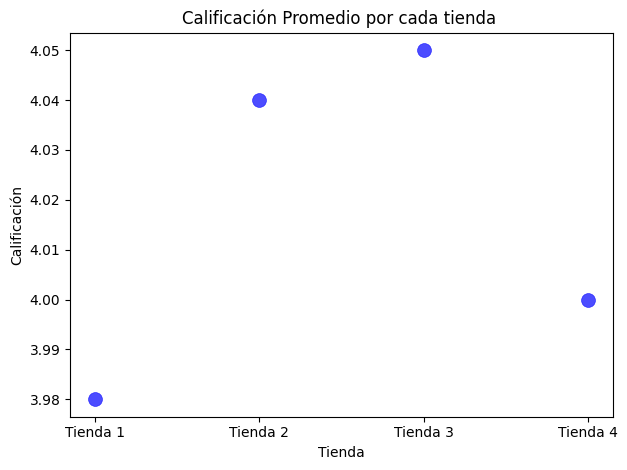

In [26]:
def grafica_calificaciones(lista_tiendas):
  tiendas_label = [d['Tienda'] for d in calificaciones_lista]
  calificaciones_label = [d['Calificación Promedio'] for d in calificaciones_lista]

  plt.scatter(tiendas_label, calificaciones_label, color='blue', s=100, alpha=0.7, linewidth=0.5)
  plt.title('Calificación Promedio por cada tienda ')
  plt.xlabel('Tienda')
  plt.ylabel('Calificación')
  plt.tight_layout()
  plt.show()

grafica_calificaciones(lista_tiendas)


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda